In [3]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [28]:
draft = pd.read_csv('../data/nbaplayersdraft.csv')

draft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [4]:
#group the schools together by aggregating the data and sorting by total minutes played
df1 =draft.groupby(['college']).sum()
df1.sort_values(['minutes_played'], ascending=False)


#create df with schools ranked by total minutes played
df2 = df1.sort_values(['minutes_played'], ascending=False).reset_index()

#simplfied df only the schools and their respective rankings
CollegeRanking_MP =df2[["college",'minutes_played']].reset_index()

#assign the index as their college ranking
CollegeRanking_MP.columns=["college_rank","college","minutes_played"]

CollegeRanking_MP


,college_rank,college,minutes_played
0,0,Kentucky,538292.0
1,1,Duke,535270.0
2,2,UNC,504352.0
3,3,Arizona,419753.0
4,4,UCLA,397511.0
...,...,...,...
232,232,UW-Milwaukee,0.0
233,233,University of Delaware,0.0
234,234,NC Central,0.0
235,235,Alabama State University,0.0


In [5]:
#save table/legend as a .csv file
CollegeRanking_MP.to_csv('../data/Colleges_by_MinutesPlayed.csv', index=False)

EDA

In [6]:
#EDA 
draft.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


In [7]:
"""# of rows != # of colleges"""
# this means there are some players who did not attend college
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

In [8]:
#only interested in players that went to college
#create a new DF that only has players that went to college
Players_college = draft.dropna(subset=['college'])
Players_college.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1585 entries, 0 to 1920
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1585 non-null   int64  
 1   year                       1585 non-null   int64  
 2   rank                       1585 non-null   int64  
 3   overall_pick               1585 non-null   int64  
 4   team                       1585 non-null   object 
 5   player                     1585 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1424 non-null   float64
 8   games                      1424 non-null   float64
 9   minutes_played             1424 non-null   float64
 10  points                     1424 non-null   float64
 11  total_rebounds             1424 non-null   float64
 12  assists                    1424 non-null   float64
 13  field_goal_percentage      1420 non-null   float64
 1

In [9]:
#create a column that look at all players, their school and assigns the approriate rank for said school
NBA_withRankings = Players_college
collegeRanking =[]

for i in NBA_withRankings['college']:
    for idx, college in enumerate(CollegeRanking_MP['college']): 
        if i == college:
            collegeRanking.append(idx)

#check to see if its the includes all the players (1585 total)
len(collegeRanking)

1585

In [10]:
#Add column to the DF
NBA_withRankings['college_rank'] = collegeRanking

#save draft with the rankings
NBA_withRankings.to_csv('../data/Draft_withRankings.csv', index=False)

C:\Users\l3onw\AppData\Local\Temp\ipykernel_18924\3707955381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_withRankings['college_rank'] = collegeRanking


In [11]:
#now just look at the top 50 schools to see patterns
Top50Schools = NBA_withRankings[NBA_withRankings['college_rank'] < 50]
Top50Schools.to_csv('../data/Top50Schools.csv',index=False)

**Now there are 4 distinct Dataframe**

draft - the complete unaltered data on all players 

Players_college - draft but removed rows containing players who did not attend college

NBA_withRankings - List of all players who attended college, with their school's respective ranking

Top50Schools - Contains info on all players who attended a top 50 college

In [29]:
Top50Schools.groupby(['college'])['points_per_game'].mean().sort_values( ascending = False).head()


college
Wake Forest    11.109091
Kentucky       10.114035
Ohio State      9.800000
Oklahoma        9.650000
Duke            9.439623
Name: points_per_game, dtype: float64

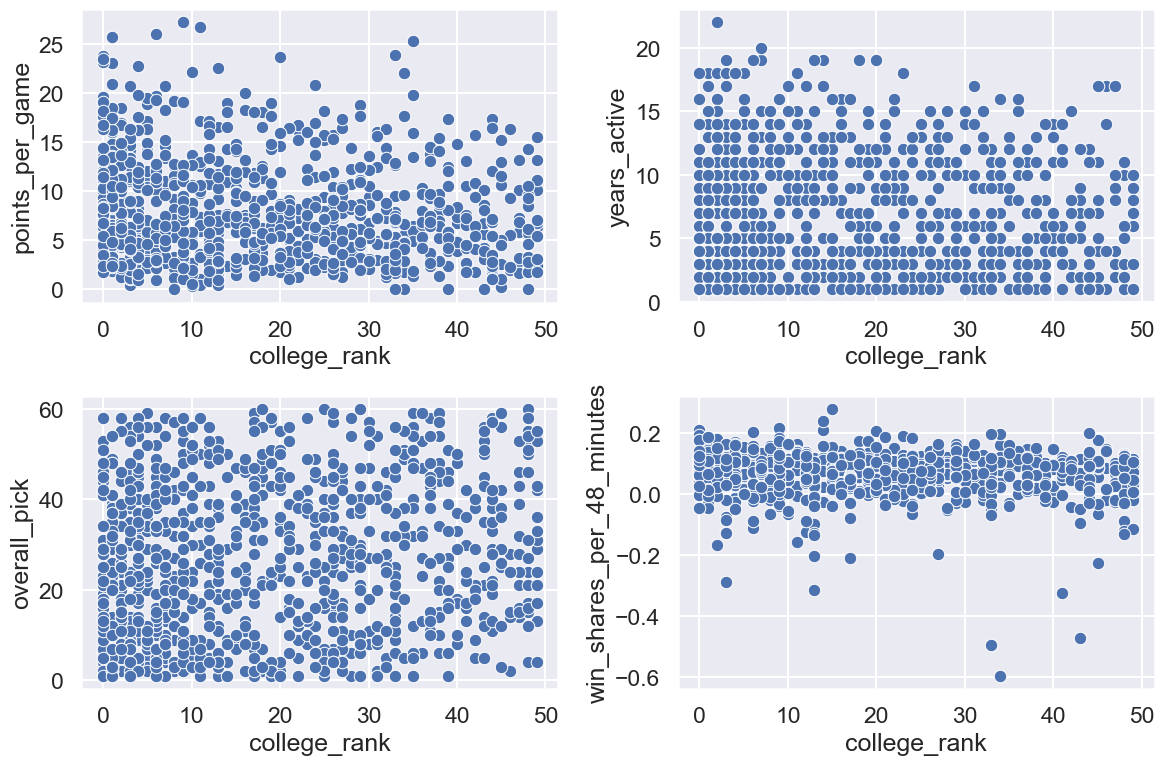

In [49]:
#set theme
sns.set_theme(style = 'darkgrid', context = 'talk')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
#sum the relationship is much more apparent
#bar graphs wook too

sns.scatterplot(ax=axes[0,0] ,x=Top50Schools['college_rank'], y=Top50Schools['points_per_game'])
sns.scatterplot(ax=axes[0,1] ,x=Top50Schools['college_rank'], y=Top50Schools['years_active'])
sns.scatterplot(ax=axes[1,0] ,x=Top50Schools['college_rank'], y=Top50Schools['overall_pick'])
sns.scatterplot(ax=axes[1,1] ,x=Top50Schools['college_rank'], y=Top50Schools['win_shares_per_48_minutes'])

#clean layout
plt.tight_layout()

#save image
plt.savefig('../images/CollegeRank_scatters_allPlayers.png')


- No visible outliers across all players who attended college 
    - Possible outliers in the win_shares_per_48_minutes chart 
    - However these are no longer present once measure are averaged out by school 
- Difficult to identify patterns when using all players

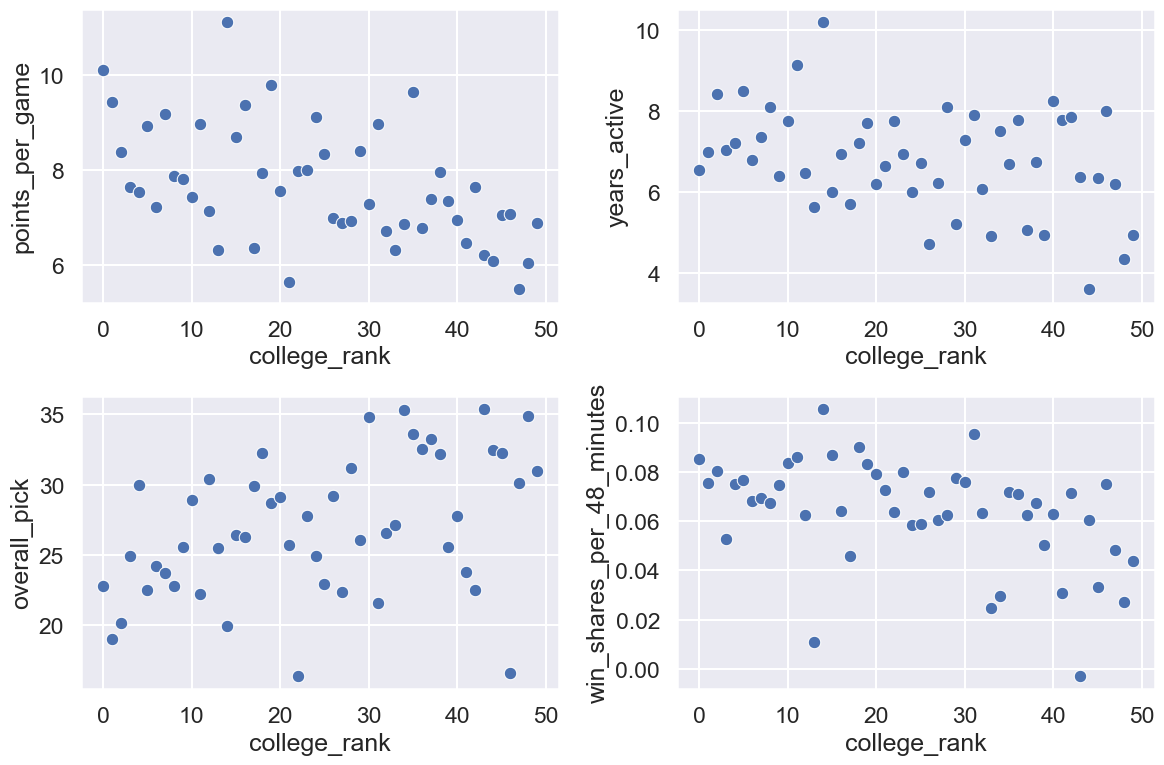

In [40]:
# try with top 50 schools

#set theme
sns.set_theme(style = 'darkgrid', context = 'talk')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# scatterplots for each college(ranking) and that school's average respective measures
sns.scatterplot(ax=axes[0,0] ,data = Top50Schools.groupby(['college_rank'])['points_per_game'].mean())
sns.scatterplot(ax=axes[0,1] ,data = Top50Schools.groupby(['college_rank'])['years_active'].mean())
sns.scatterplot(ax=axes[1,0] ,data = Top50Schools.groupby(['college_rank'])['overall_pick'].mean())
sns.scatterplot(ax=axes[1,1] ,data = Top50Schools.groupby(['college_rank'])['win_shares_per_48_minutes'].mean())

plt.tight_layout()

plt.savefig('../images/CollegeRank_measures_scatters.png')



<Axes: xlabel='overall_pick', ylabel='points_per_game'>

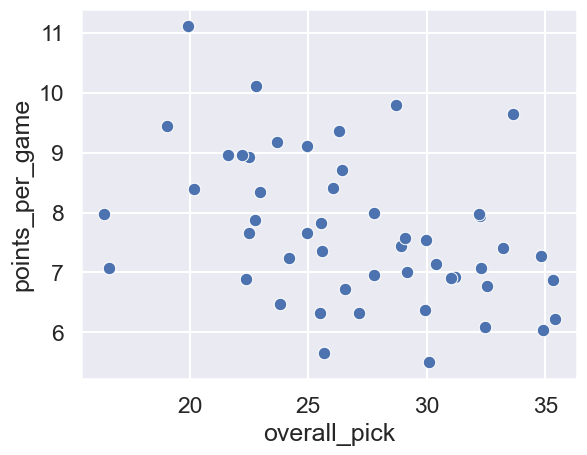

In [ ]:

sns.scatterplot(x= Top50Schools.groupby(['college_rank'])['overall_pick'].mean(), y=Top50Schools.groupby(['college_rank'])['points_per_game'].mean())

plt.savefig('../images/OP_PPG_bySchool.png')
